In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from warnings import filterwarnings
filterwarnings('ignore')

# **Loading train and Data**


In [2]:
train_data = pd.read_csv('../input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('../input/titanic/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
submission_data = pd.read_csv('../input/titanic/gender_submission.csv')
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# **Dealing with NAN values**`

In [5]:
print(train_data.isnull().sum())
print()
print('train_data shape -->',train_data.shape)
print()
print()
print(test_data.isnull().sum())
print()
print('test_data shape -->',test_data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

train_data shape --> (891, 12)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

test_data shape --> (418, 11)


# Cabin column NaN
**We can see the most values in the Cabin column have a NaN values**<br>
**SO, It will better to remove the Cabin column**<br>
**Because, it's difficult to treat**<br>

In [6]:
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

In [7]:
print(train_data.isnull().sum())
print()
print('train_data shape -->',train_data.shape)
print()
print()
print(test_data.isnull().sum())
print()
print('test_data shape -->',test_data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

train_data shape --> (891, 11)


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

test_data shape --> (418, 10)


# Age column NaN
**In the next few line, we will try to treat the NaN values in the Age coulmn**<br>
**As we know, we can predict the age for any person by knowing it's name Title ('Mr', 'Mrs', 'Miss', 'Dr', etc...)**<br>
**So, we will extract the name titels from the passengers names**


In [8]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.')    
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.')

In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [10]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [11]:
all_data = [train_data, test_data]

In [12]:
for data in all_data:
    data.loc[(data['Age'].isnull()) & (data['Title'] == 'Mr'), 'Age'] = data[data['Title'] == 'Mr']['Age'].mean()
    data.loc[(data['Age'].isnull()) & (data['Title'] == 'Mrs'), 'Age'] = data[data['Title'] == 'Mrs']['Age'].mean()
    data.loc[(data['Age'].isnull()) & (data['Title'] == 'Miss'), 'Age'] = data[data['Title'] == 'Miss']['Age'].mean()
    data.loc[(data['Age'].isnull()) & (data['Title'] == 'Master'), 'Age'] = data[data['Title'] == 'Master']['Age'].mean()
    data.loc[(data['Age'].isnull()) & (data['Title'] == 'Dr'), 'Age'] = data[data['Title'] == 'Dr']['Age'].mean()
    data.loc[(data['Age'].isnull()) & (data['Title'] == 'Rev'), 'Age'] = data[data['Title'] == 'Rev']['Age'].mean()
    data.loc[(data['Age'].isnull()), 'Age'] = data['Age'].mean()

In [13]:
print(train_data.isnull().sum())
print()
print('train_data shape -->',train_data.shape)
print()
print()
print(test_data.isnull().sum())
print()
print('test_data shape -->',test_data.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64

train_data shape --> (891, 12)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
dtype: int64

test_data shape --> (418, 11)


# Embarked column NaN
**In this column, we have only two NaN values**<br>
**We can remove the two records to solve the NaN value problem**<br>
**but We have little data**<br>
**So**<br>
**We solve it by replace the the NaN values by the most frequent value**

In [14]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [16]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
print(train_data.isnull().sum())
print()
print('train_data shape -->',train_data.shape)
print()
print()
print(test_data.isnull().sum())
print()
print('test_data shape -->',test_data.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

train_data shape --> (891, 12)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
dtype: int64

test_data shape --> (418, 11)


# Fare column NaN
**In this column, we have only one NaN values**<br>
**We will replace it by the Fare mean**

In [18]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [19]:
print(train_data.isnull().sum())
print()
print('train_data shape -->',train_data.shape)
print()
print()
print(test_data.isnull().sum())
print()
print('test_data shape -->',test_data.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

train_data shape --> (891, 12)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

test_data shape --> (418, 11)


# Drop coulmns operation
**'PassengerId' coulumn in our database have a unique number for every client**.<br>
**'Name' and 'Ticket' columns will have no effect in our prediction**<br>
**'Title' coulmn used in predicted the Age missing values,** <br>
**so we will not need it anymore**

In [20]:
drop_list = ['PassengerId', 'Name', 'Ticket', 'Title']
train_data.drop(drop_list, axis = 1, inplace = True)
test_data.drop(drop_list, axis = 1, inplace = True)

In [21]:
print(train_data.info())
print()
print()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 n

In [22]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Visualization of Data
**We will create some figure to know more about data** <br>
**and discover,** <br>
**if we want another data processing operations** <br>

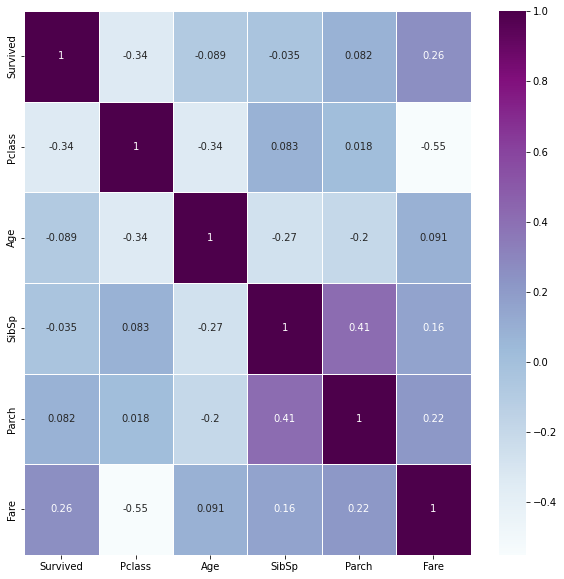

In [23]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_data.corr(), cmap = 'BuPu', cbar = True, annot = True, linewidth = 0.5, ax = ax)
plt.show()

In [24]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

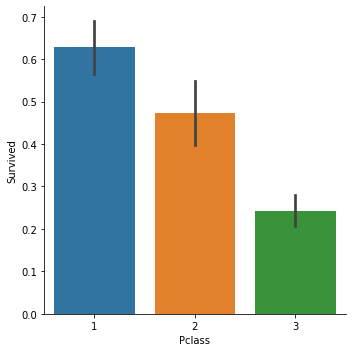

In [25]:
sns.catplot(x = 'Pclass', y= 'Survived', kind = 'bar', data = train_data)

**first class passengers have better survival chance than second.**<br>
**And, second class passengers have better survival chance than third.**<br>
 

In [26]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

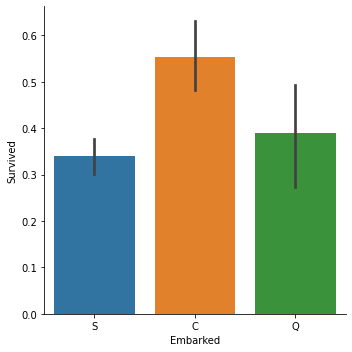

In [27]:
sns.catplot(x = 'Embarked', y= 'Survived', kind = 'bar', data = train_data)

**We can see in the previous figure**<br>
**the C Embarked passenger have better survival chance.**

In [28]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

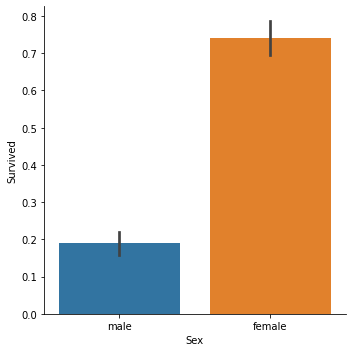

In [29]:
sns.catplot(x = 'Sex', y= 'Survived', kind = 'bar', data = train_data)

**The previous chart is very interesting.** <br>
**Females have a very high survival chance compared to male**<br>
**Females survival chance is more than 70%**<br>
**Men's chance of survival does not exceed 20%.**<br>
**This could be due to men trying to save their own women,**<br>
**such as wives, mothers and their daughters**<br>
**They would rather save them from drowning than save themselves**

In [30]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

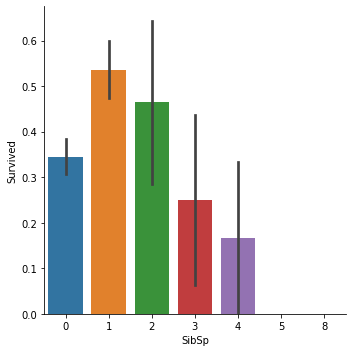

In [31]:
sns.catplot(x = 'SibSp', y= 'Survived', kind = 'bar', data = train_data)

In [32]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

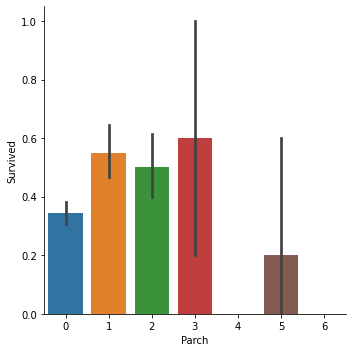

In [33]:
sns.catplot(x = 'Parch', y= 'Survived', kind = 'bar', data = train_data)

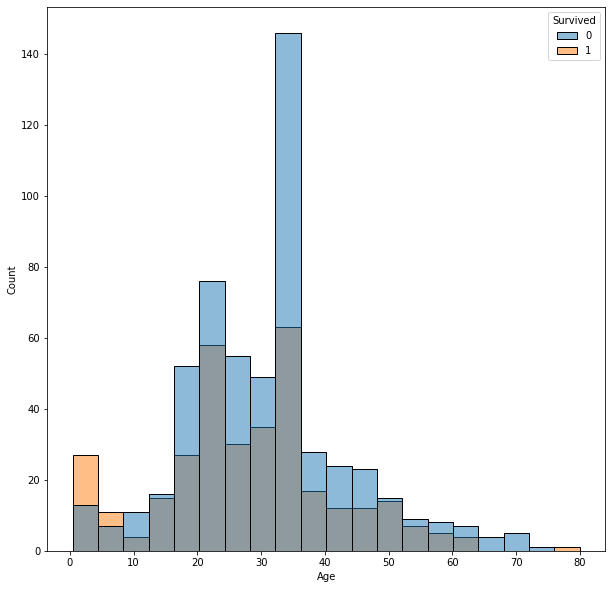

In [34]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.histplot(x = train_data['Age'],  bins=20, hue = train_data['Survived'])
plt.show()

**The number of children who survived drowning is greater than the number of children who drowned**<br>
**This is due to the parents trying to save them**<br>
**and we can the the number of drowned passengers whose have age between 30 to 40 is more than survived passenger in the same age range by double**

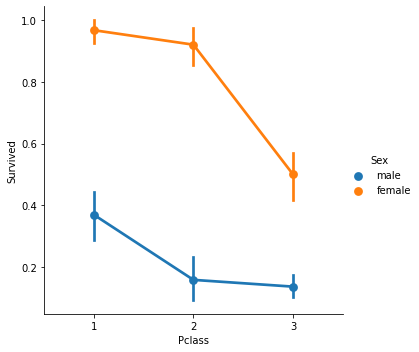

In [35]:
sns.catplot(x = 'Pclass', y = 'Survived', data = train_data, kind = 'point', hue = 'Sex')

**We know in the previous figures the all femals and passenger in First class have a better survival chance**<br>
**This figure shows**<br>
**Almost all females in the first class survive from drowning**<br>
**and the females in the second class has a very high chane**

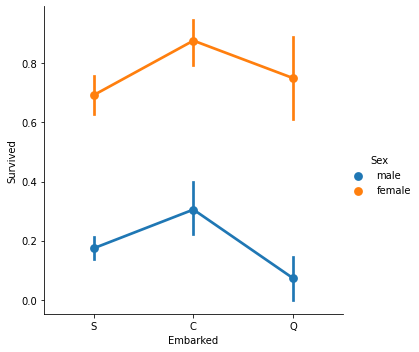

In [36]:
sns.catplot(x = 'Embarked', y = 'Survived', data = train_data, kind = 'point', hue = 'Sex')

**We know in the previous figures the all femals and passenger in C Embarked have a better survival chance**<br>
**This figure shows**<br>
**females in the C Embarked have a high survival chance**<br>

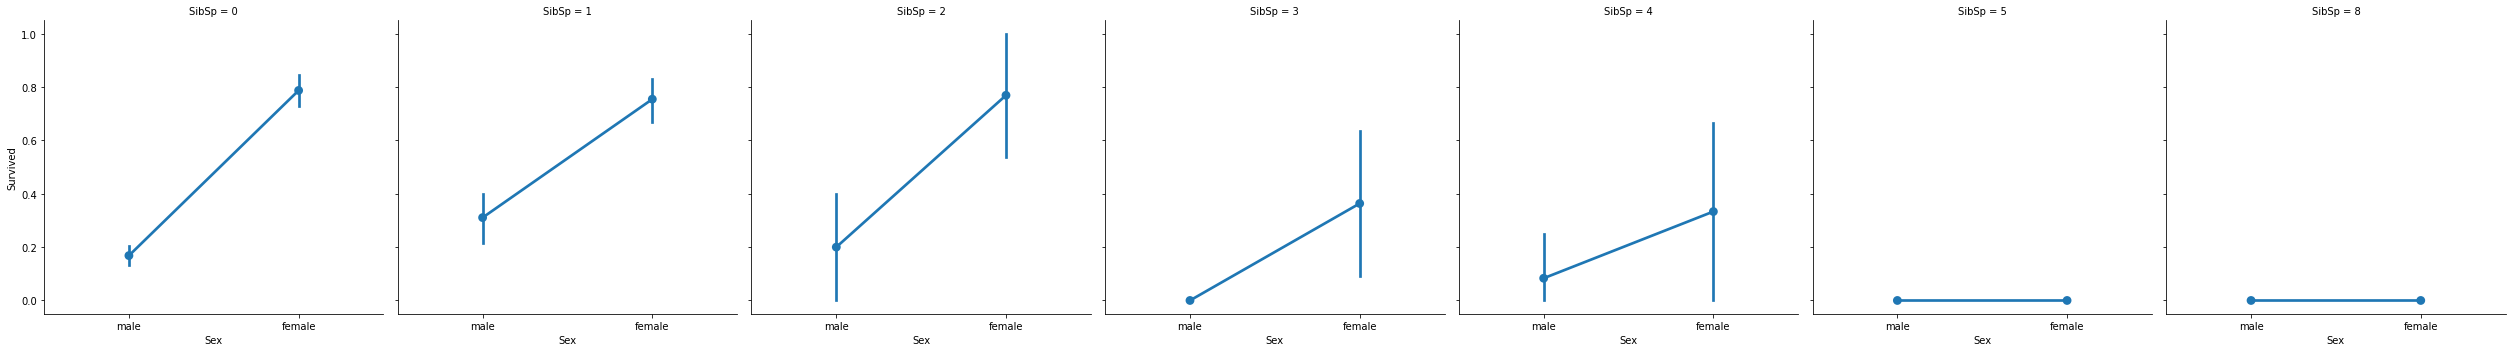

In [37]:
sns.factorplot(x = 'Sex', y = 'Survived', data = train_data, kind = 'point', col = 'SibSp')

<AxesSubplot:xlabel='Fare', ylabel='Age'>

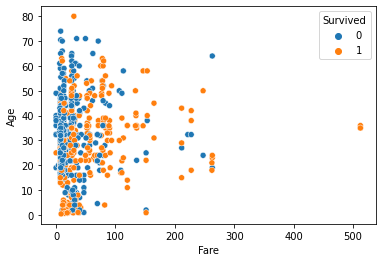

In [38]:
sns.scatterplot(y = 'Age', x = 'Fare', data = train_data, hue = 'Survived')


**Passengers with high-priced tickets have a higher chance of survival compared to passenger with low-priced ticketd**

# Dummy variables
**Convert categorical variables into dummy**

In [39]:
print(train_data.shape)
print(test_data.shape)

(891, 8)
(418, 7)


In [40]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [42]:
train_data_2 = pd.get_dummies(train_data)
train_data_2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [43]:
test_data_2 = pd.get_dummies(test_data)
test_data_2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [44]:
print(train_data_2.shape)
print(test_data_2.shape)

(891, 11)
(418, 10)


# Spliting the data into training and test

In [45]:
X_train = train_data_2.drop('Survived', axis = 1).values
y_train = train_data_2['Survived'].values.reshape((-1, 1))
X_test = test_data_2.values
y_test = submission_data.drop('PassengerId', axis = 1).values.reshape((-1, 1))

print('x train shape {}'.format(X_train.shape))
print('y train shape {}'.format(y_train.shape))
print('x test  shape {}'.format(X_test.shape))
print('y test  shape {}'.format(y_test.shape))

x train shape (891, 10)
y train shape (891, 1)
x test  shape (418, 10)
y test  shape (418, 1)


# ***Logistic Regression***

In [46]:
logistic_model = LogisticRegression(solver = 'liblinear')

In [47]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(logistic_model.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

80.02244668911335
94.49760765550239
[[254  12]
 [ 11 141]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418



# ***SVM classifier***

In [48]:
SVC_class = SVC(C = 0.1, kernel = 'linear')

In [49]:
SVC_class.fit(X_train,y_train)
y_pred = SVC_class.predict(X_test)
print(SVC_class.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

78.67564534231201
100.0
[[266   0]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



# ***Decision Tree Classifier***

In [50]:
tree_class = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best', random_state=1)

In [51]:
tree_class.fit(X_train, y_train)
y_pred = tree_class.predict(X_test)
print(tree_class.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

83.38945005611671
94.25837320574163
[[250  16]
 [  8 144]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.90      0.95      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



# ***Random Forest Classifier***

In [52]:
Random_class = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state = 33)

In [53]:
Random_class.fit(X_train, y_train)
y_pred = Random_class.predict(X_test)
print(Random_class.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

81.03254769921436
98.56459330143541
[[265   1]
 [  5 147]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       266
           1       0.99      0.97      0.98       152

    accuracy                           0.99       418
   macro avg       0.99      0.98      0.98       418
weighted avg       0.99      0.99      0.99       418



# ***Voting Classifier***

In [54]:
Voting_class = VotingClassifier(estimators=[('SVC_class', SVC_class),('tree_class', tree_class), ('logistig_model', logistic_model), ('Random_class', Random_class)], 
                                voting='hard')

In [55]:
Voting_class.fit(X_train, y_train)
y_pred = Voting_class.predict(X_test)
print(Voting_class.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

81.03254769921436
98.32535885167464
[[265   1]
 [  6 146]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       266
           1       0.99      0.96      0.98       152

    accuracy                           0.98       418
   macro avg       0.99      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



# **Detecting Data imbalancing**

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_sm_train , y_sm_train = sm.fit_resample(X_train,y_train)
X_sm_test , y_sm_test = sm.fit_resample(X_test,y_test)

# ***Logistic Regression After Scaling***

In [57]:
logistic_model_2 = LogisticRegression(solver = 'liblinear')

In [58]:
logistic_model_2.fit(X_sm_train, y_sm_train)
y_pred = logistic_model_2.predict(X_sm_test)
print(logistic_model_2.score(X_sm_train,y_sm_train)*100)
print(accuracy_score(y_sm_test, y_pred)*100)
print(confusion_matrix(y_sm_test, y_pred))
print(classification_report(y_sm_test, y_pred))

78.32422586520947
92.66917293233082
[[231  35]
 [  4 262]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       266
           1       0.88      0.98      0.93       266

    accuracy                           0.93       532
   macro avg       0.93      0.93      0.93       532
weighted avg       0.93      0.93      0.93       532



# ***SVC After Scaling***

In [59]:
SVC_class_2 = SVC(C = 0.1, kernel = 'linear')

In [60]:
SVC_class_2.fit(X_sm_train, y_sm_train)
y_pred = SVC_class_2.predict(X_sm_test)
print(SVC_class_2.score(X_sm_train,y_sm_train)*100)
print(accuracy_score(y_sm_test, y_pred)*100)
print(confusion_matrix(y_sm_test, y_pred))
print(classification_report(y_sm_test, y_pred))

77.59562841530054
100.0
[[266   0]
 [  0 266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       266

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



# ***Decision Tree Classifier After Scaling***

In [61]:
tree_class_2 = DecisionTreeClassifier(criterion='gini', max_depth=2, splitter='best', random_state=33)

In [62]:
tree_class_2.fit(X_sm_train,y_sm_train)
y_pred = tree_class_2.predict(X_sm_test)
print(tree_class_2.score(X_sm_train,y_sm_train)*100)
print(accuracy_score(y_sm_test, y_pred)*100)
print(confusion_matrix(y_sm_test, y_pred))
print(classification_report(y_sm_test, y_pred))

79.05282331511839
100.0
[[266   0]
 [  0 266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       266

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



# ***Random Forest After Scaling***

In [63]:
Random_class_2 = RandomForestClassifier(n_estimators=400, criterion='gini', max_depth=2, random_state = 33)

In [64]:
Random_class_2.fit(X_sm_train,y_sm_train)
y_pred = Random_class_2.predict(X_sm_test)
print(Random_class_2.score(X_sm_train,y_sm_train)*100)
print(accuracy_score(y_sm_test, y_pred)*100)
print(confusion_matrix(y_sm_test, y_pred))
print(classification_report(y_sm_test, y_pred))

79.05282331511839
100.0
[[266   0]
 [  0 266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       266

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



# ***Voting Classifier After Scaling***

In [65]:
Voting_class_2 = VotingClassifier(estimators=[('tree_class', tree_class_2), ('logistig_model', logistic_model_2), ('SVC_class_2', SVC_class_2), ('Random_class', Random_class_2)], 
                                voting='hard')

In [66]:
Voting_class_2.fit(X_sm_train,y_sm_train)
y_pred = Voting_class_2.predict(X_sm_test)
print(Voting_class_2.score(X_sm_train,y_sm_train)*100)
print(accuracy_score(y_sm_test, y_pred)*100)
print(confusion_matrix(y_sm_test, y_pred))
print(classification_report(y_sm_test, y_pred))

77.8688524590164
100.0
[[266   0]
 [  0 266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       266

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



# ***Now we will compare between the best algorithm before scalling and the best after scalling***

In [67]:
print('The classification report for the best model before scalling')
print('.....................SVC classifier.........................')
print(classification_report(y_test,SVC_class.predict(X_test)))
print()
print('.................Decision Tree Classifier...................')
print('The classification report for the best model after scalling')
print(classification_report(y_sm_test, tree_class_2.predict(X_sm_test)))

The classification report for the best model before scalling
.....................SVC classifier.........................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418


.................Decision Tree Classifier...................
The classification report for the best model after scalling
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       266

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



**In the end, we found SVC and Decision tree is the best algorithm.**<br>
**with accurecy score = 100.00 %**<br>
**and with f1_score = 100.00 %**<br>